<a href="https://colab.research.google.com/github/Ashwitharavula/ps_lab/blob/main/ieee%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Indian_Kids_Screen_Time.csv to Indian_Kids_Screen_Time (2).csv
✅ Dataset 'Indian_Kids_Screen_Time (2).csv' loaded successfully via upload!

Dataset shape: (9712, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


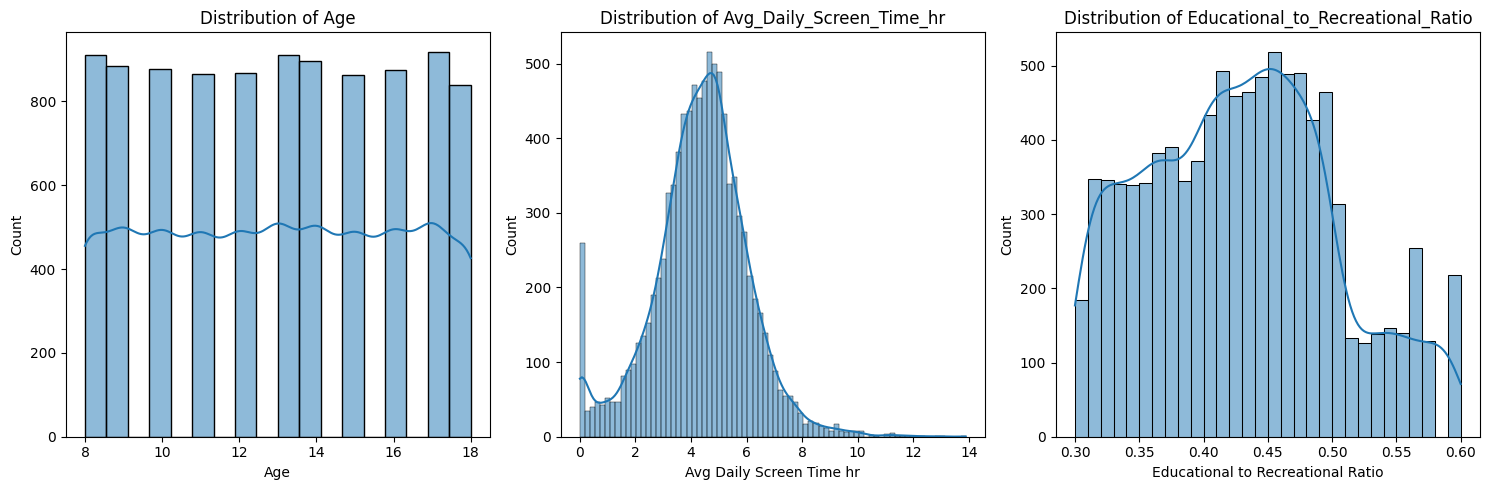

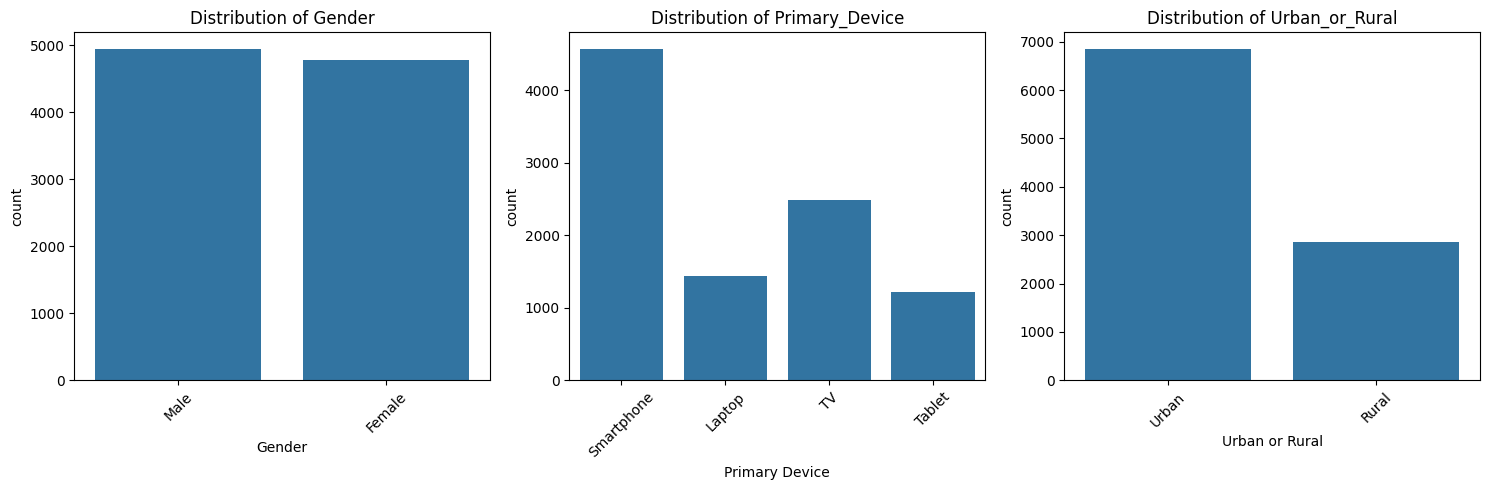

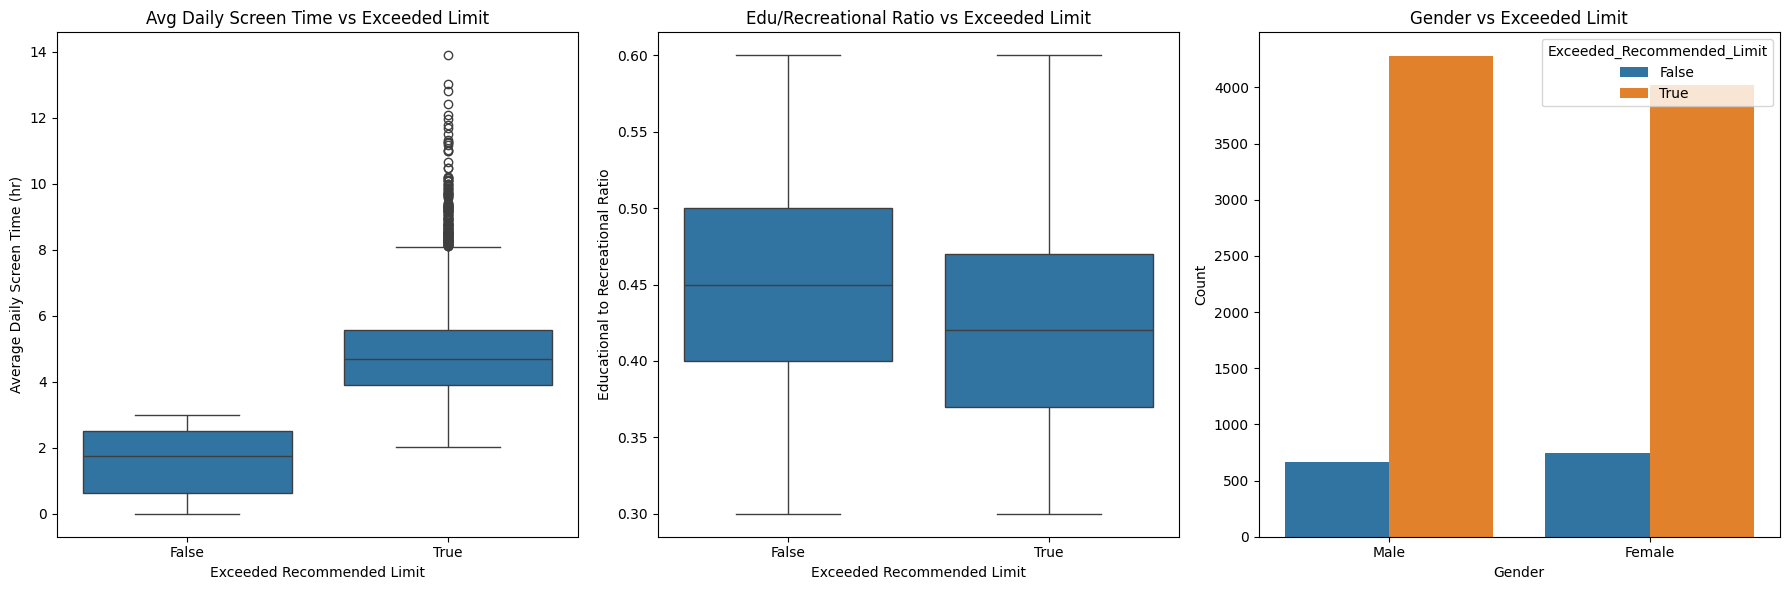

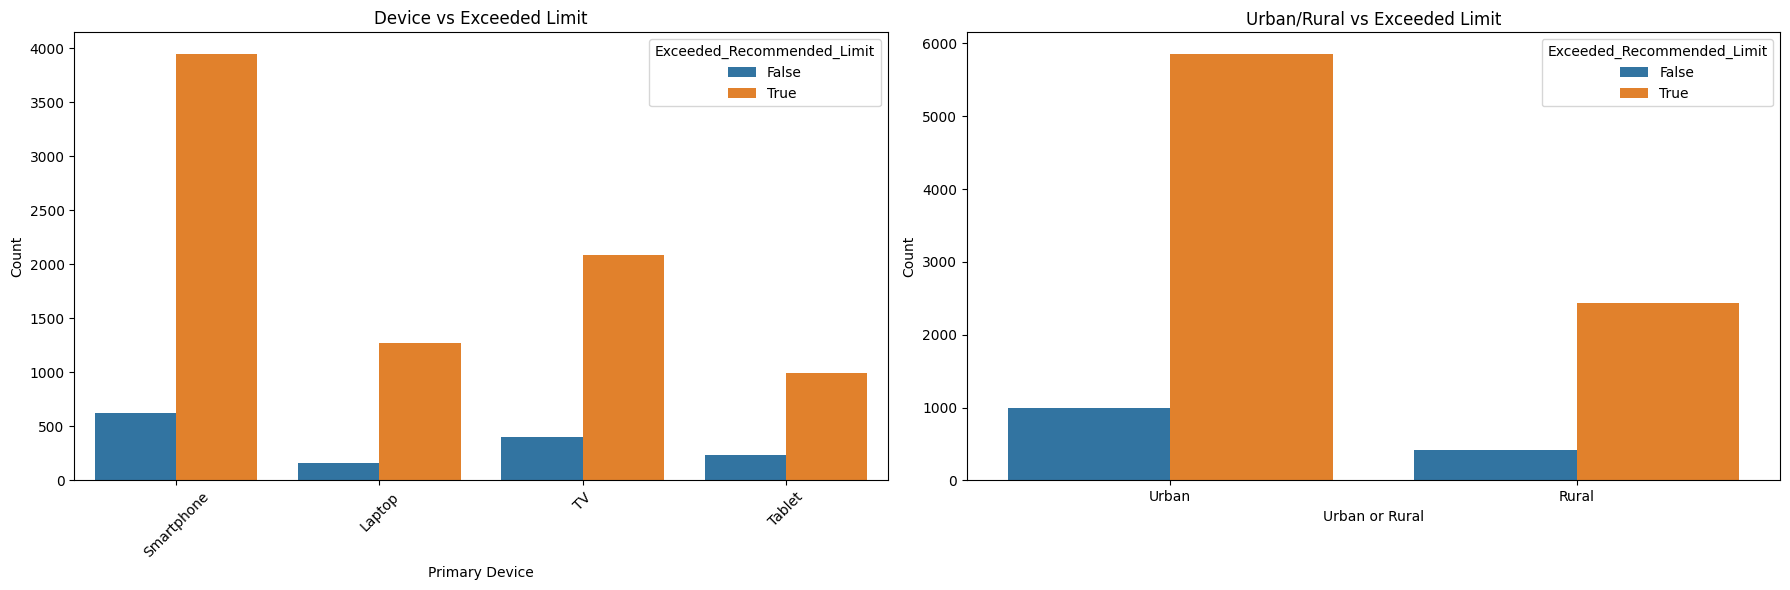


Target distribution:
Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64

Train/Test shapes: (7769, 26) (1943, 26)

--- Training and Tuning KNN ---

📌 KNN Results
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 97.58 %
              precision    recall  f1-score   support

       False       0.93      0.90      0.92       282
        True       0.98      0.99      0.99      1661

    accuracy                           0.98      1943
   macro avg       0.96      0.94      0.95      1943
weighted avg       0.98      0.98      0.98      1943



<Figure size 500x400 with 0 Axes>

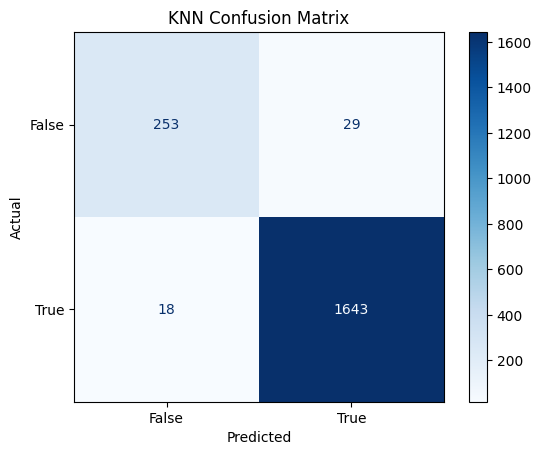


--- Training and Tuning SVM ---

📌 SVM Results
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 98.51 %
              precision    recall  f1-score   support

       False       0.97      0.93      0.95       282
        True       0.99      1.00      0.99      1661

    accuracy                           0.99      1943
   macro avg       0.98      0.96      0.97      1943
weighted avg       0.98      0.99      0.98      1943



<Figure size 500x400 with 0 Axes>

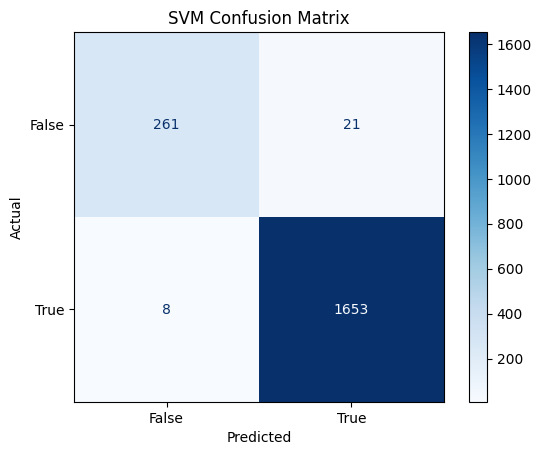


--- Training and Tuning RandomForest ---

📌 RandomForest Results
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 100.0 %
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       282
        True       1.00      1.00      1.00      1661

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943



<Figure size 500x400 with 0 Axes>

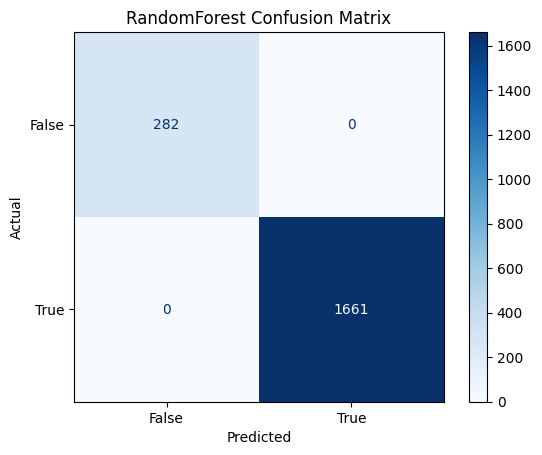


--- Training and Tuning LogisticRegression ---

📌 LogisticRegression Results
Best Parameters: {'C': 1}
Accuracy: 97.84 %
              precision    recall  f1-score   support

       False       0.95      0.90      0.92       282
        True       0.98      0.99      0.99      1661

    accuracy                           0.98      1943
   macro avg       0.97      0.95      0.96      1943
weighted avg       0.98      0.98      0.98      1943



<Figure size 500x400 with 0 Axes>

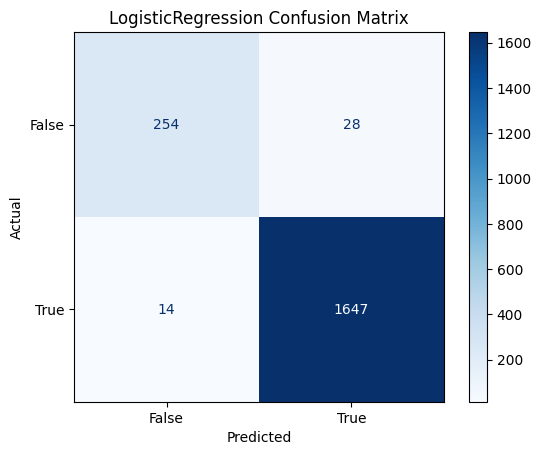

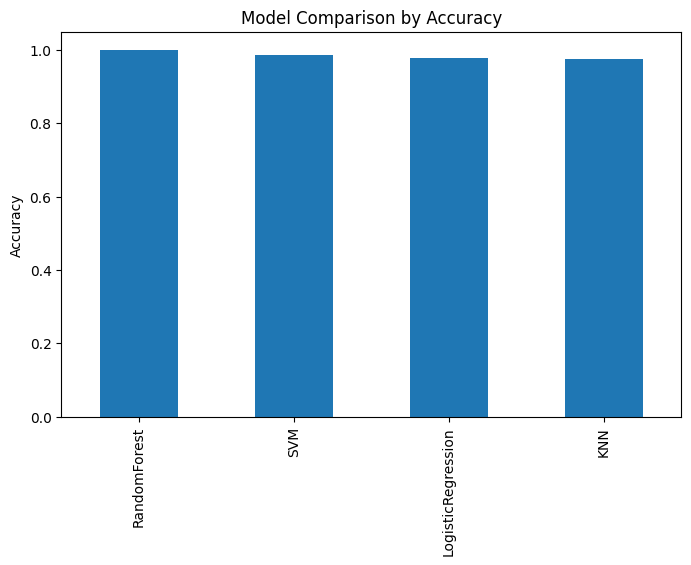

In [4]:
# ================================================
# 📌 Indian Kids Screen Time Analysis + Classifiers
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from google.colab import files # Keep import for file upload option

# -------------------------------
# Load dataset (works in Colab or Jupyter)
df = None # Initialize df to None
try:
    # ✅ For Google Colab users - attempt upload first as it was used successfully before
    uploaded = files.upload()
    import io
    # Assuming the key in uploaded dictionary matches the filename
    uploaded_filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))
    print(f"✅ Dataset '{uploaded_filename}' loaded successfully via upload!")

except FileNotFoundError:
     print("Upload failed or file not found in upload. Trying local path...")
     try:
        # ✅ For local Jupyter / Colab sample_data folder
        df = pd.read_csv("Indian_Kids_Screen_Time.csv")  # <-- adjust path if needed
        print("✅ Dataset loaded successfully from path!")
     except FileNotFoundError:
        print("❌ Error: Dataset not found. Please upload the file manually or check the path.")
        df = None  # Prevents later errors
except Exception as e:
    print(f"An unexpected error occurred during file loading: {e}")
    df = None


# -------------------------------
# Proceed only if dataset is loaded
if df is not None:
    print("\nDataset shape:", df.shape)
    display(df.head())
    df.info()

    # -------------------------------
    # Basic visualizations
    numerical_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
    categorical_cols = ['Gender', 'Primary_Device', 'Urban_or_Rural']

    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numerical_cols):
        plt.subplot(1, 3, i+1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col.replace('_', ' ')) # Improve readability
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 5))
    for i, col in enumerate(categorical_cols):
        plt.subplot(1, 3, i+1)
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.xlabel(col.replace('_', ' ')) # Improve readability
    plt.tight_layout()
    plt.show()

    # -------------------------------
    # Visualizations w.r.t Target
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x='Exceeded_Recommended_Limit', y='Avg_Daily_Screen_Time_hr')
    plt.title('Avg Daily Screen Time vs Exceeded Limit')
    plt.xlabel('Exceeded Recommended Limit')
    plt.ylabel('Average Daily Screen Time (hr)')

    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='Exceeded_Recommended_Limit', y='Educational_to_Recreational_Ratio')
    plt.title('Edu/Recreational Ratio vs Exceeded Limit')
    plt.xlabel('Exceeded Recommended Limit')
    plt.ylabel('Educational to Recreational Ratio')


    plt.subplot(1, 3, 3)
    sns.countplot(data=df, x='Gender', hue='Exceeded_Recommended_Limit')
    plt.title('Gender vs Exceeded Limit')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='Primary_Device', hue='Exceeded_Recommended_Limit')
    plt.title('Device vs Exceeded Limit')
    plt.xlabel('Primary Device')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='Urban_or_Rural', hue='Exceeded_Recommended_Limit')
    plt.title('Urban/Rural vs Exceeded Limit')
    plt.xlabel('Urban or Rural')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    print("\nTarget distribution:")
    print(df['Exceeded_Recommended_Limit'].value_counts())

    # -------------------------------
    # Data Preprocessing
    target = "Exceeded_Recommended_Limit"
    y = df[target]
    X = df.drop(columns=[target])

    # Handle missing values
    if 'Health_Impacts' in X.columns:
        # Use .loc to avoid SettingWithCopyWarning
        X.loc[:, 'Health_Impacts'] = X['Health_Impacts'].fillna(X['Health_Impacts'].mode()[0])

    # One-hot encode categoricals
    categorical_cols_for_encoding = X.select_dtypes(include=['object', 'category']).columns.tolist()
    X_encoded = pd.get_dummies(X, columns=categorical_cols_for_encoding, drop_first=False)

    # Encode target if needed
    if y.dtype == 'object' or y.dtype == 'bool':
        le = LabelEncoder()
        y_enc = le.fit_transform(y)
        # Convert boolean target names to strings for plotting and reporting
        target_names = [str(name) for name in le.classes_]
    else:
        y_enc = y
        target_names = None

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y_enc, test_size=0.2, random_state=42, stratify=y_enc if target_names is not None else None
    )

    print("\nTrain/Test shapes:", X_train.shape, X_test.shape)

    # -------------------------------
    # Scale Data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # -------------------------------
    # Define Models + Hyperparameter Grids
    models = {
        "KNN": GridSearchCV(
            KNeighborsClassifier(),
            param_grid={"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
            cv=5, scoring="accuracy"
        ),
        "SVM": GridSearchCV(
            SVC(probability=True),
            param_grid={"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]},
            cv=5, scoring="accuracy"
        ),
        "RandomForest": GridSearchCV(
            RandomForestClassifier(random_state=42),
            param_grid={"n_estimators": [100, 200], "max_depth": [None, 5, 10]},
            cv=5, scoring="accuracy"
        ),
        "LogisticRegression": GridSearchCV(
            LogisticRegression(max_iter=1000),
            param_grid={"C": [0.1, 1, 10]},
            cv=5, scoring="accuracy"
        )
    }

    # -------------------------------
    # Train and Evaluate
    results = {}
    for name, model in models.items():
        print(f"\n--- Training and Tuning {name} ---")
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        results[name] = {
            "Best Params": model.best_params_,
            "Accuracy": acc,
            "Report": classification_report(y_test, y_pred, target_names=target_names, output_dict=True) # Use string target_names
        }

        print(f"\n📌 {name} Results")
        print("Best Parameters:", model.best_params_)
        print("Accuracy:", round(acc*100,2), "%")
        print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0)) # Use string target_names

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5,4))
        # Use string target_names for display_labels
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
        disp.plot(cmap="Blues")
        plt.title(f"{name} Confusion Matrix")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.show()

    # -------------------------------
    # Compare Model Accuracies
    acc_df = pd.DataFrame({k: v["Accuracy"] for k,v in results.items()}, index=["Accuracy"]).T
    acc_df.sort_values("Accuracy", ascending=False).plot(kind="bar", legend=False, figsize=(8,5))
    plt.title("Model Comparison by Accuracy")
    plt.ylabel("Accuracy")
    plt.ylim(0,1.05)
    plt.show()

else:
    print("❌ Dataframe 'df' was not created due to file loading error.")